In [1]:
# Import the requests library.
%matplotlib inline
import requests
import random
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import json
import os 
#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import timeit.
import timeit

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24fdd65da45b3edca06adaf97b4c4270


In [3]:
#def latitudes(size):
 #   latitudes = []
  #  x = 0
   # while x < (size):
    #    random_lat = random.randint(-90, 90) + random.random()
     #   latitudes.append(random_lat)
      #  x += 1
   # return latitudes
# Call the function with 1500.
#%timeit latitudes(1500)
# Create a set of random latitude and longitude combinations.
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
#lat_lngs


# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes 
#and longitudes into the coordinates list before moving on.
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])
# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [4]:
#In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so 
#that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a 
#variable.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there 
#are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude 
#and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes 
#and longitudes into the coordinates list before moving on.

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kurunegala lk
busselton au
mataura pf
kleck by
pundaguitan ph
jaslo pl
bolungarvik is
iqaluit ca
saskylakh ru
wagar sd
georgetown sh
new norfolk au
butaritari ki
victoria sc
vaini to
jamestown sh
sioux lookout ca
kirakira sb
yining cn
nikolskoye ru
tuktoyaktuk ca
astoria us
ushuaia ar
talara pe
tias es
mataura pf
codrington ag
saldanha za
ilulissat gl
punta arenas cl
bayanday ru
rikitea pf
albany au
wau pg
sicamous ca
airai pw
altay cn
ancud cl
puerto ayora ec
muroto jp
sao filipe cv
narsaq gl
avera pf
te anau nz
sinnamary gf
axim gh
skibbereen ie
busselton au
saint-philippe re
mataura pf
leningradskiy ru
phatthalung th
yellowknife ca
lebu cl
illoqqortoormiut gl
zhanaozen kz
albany au
thompson ca
batticaloa lk
pesochnoye ru
iqaluit ca
bambous virieux mu
ushuaia ar
east london za
moose factory ca
kirakira sb
mataura pf
antalaha mg
grand river south east mu
bluff nz
rikitea pf
ushuaia ar
lagoa pt
strezhevoy ru
attawapiskat ca
fairbanks us
dikson ru
ushuaia ar
faanui pf
albany au
fort nel

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

276

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key+ "&q=" + "Boston"

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

#The code output will be <Response [200]>, indicating a valid response. We won't see this code when a website appears in a 
#browser. However, when a website does not appear, we'll see a 404 code, indicating a client error. You can directly call 
#the response code with the get() method using the status_code. If we chain the status_code to the city_weather variable, 
#we get 200 as the output.

<Response [200]>

# 6.2.4: Get Data from a Response

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

#When we run this cell the output is "<Response [200]>."
#When we receive a valid response from the server, we have to decide on the data format. The options are text, JSON, XML, 
#or HTML format. We can apply the format attributes to get the data into a useful format to parse.
#One format that provides a preview of the JSON data is the text attribute. Let's get the content for the Boston weather 
#data using the following code.

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text
#The text in the output is a dictionary of dictionaries and arrays, or a JSON file. We can work with this data, but it 
#might be more challenging if we needed to retrieve temperature (temp) and humidity ( humidity) from this output because 
#the data is in a sentence format.

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":51.04,"feels_like":44.69,"temp_min":48,"temp_max":54,"pressure":1025,"humidity":71},"visibility":10000,"wind":{"speed":8.05,"deg":110},"clouds":{"all":40},"dt":1616547534,"sys":{"type":1,"id":3486,"country":"US","sunrise":1616496111,"sunset":1616540369},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 51.04,
  'feels_like': 44.69,
  'temp_min': 48,
  'temp_max': 54,
  'pressure': 1025,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1616547534,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616496111,
  'sunset': 1616540369},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# 6.2.4: Handle Request Errors

In [14]:

#When we submit a get request for the city_weather, we want to make sure that we get a valid response, i.e., 200, before 
#we retrieve any data. To check if we get a valid response, we can write a conditional expression that will evaluate 
#whether the status code is equal to 200. If it is, then we can print out a statement that says the weather data was found. 
#If there is a response other than 200, we can print out a statement that says the weather was not found, as in the 
#following example:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
#When the conditional expression is evaluated, it will print City weather found if true, or City weather not found if false.
#When we run the cell code above, the output is City weather found.

City Weather found.


# Module 6.2.5: Parse a Response from an API

In [15]:

#Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston. 
#First, correct the spelling for the city of Boston to get a valid URL
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 51.04,
  'feels_like': 44.69,
  'temp_min': 48,
  'temp_max': 54,
  'pressure': 1025,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1616547534,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616496111,
  'sunset': 1616540369},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:

#let's assign a variable to the city_weather.json() data to the variable "boston_data" 
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']['country']

'US'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
#If we want to retrieve the date in the weather data, we would add the dt key to the boston_data variable
boston_data["dt"]

1616547534

In [20]:

#Using similar syntax to get the time of day, we can get the latitude, longitude, maximum temperature, humidity, 
#percent cloudiness, and wind speed. Add the following code to a new cell and run the cell.

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 54 71 40 8.05


# 6.2.5: Convert the Date Timestamp

In [21]:

#Let's convert the date from the Boston weather data in the JSON format to the ISO format

# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 3, 24, 0, 58, 54)

# 6.2.6: Get the City Weather Data

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each 
#recorded response and the set to start at 1.

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
for city in cities:
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kurunegala
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kleck
Processing Record 5 of Set 1 | pundaguitan
Processing Record 6 of Set 1 | jaslo
Processing Record 7 of Set 1 | bolungarvik
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | wagar
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | sioux lookout
Processing Record 18 of Set 1 | kirakira
Processing Record 19 of Set 1 | yining
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | astoria
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | talara
Processing Record

-----------------------------
Data Retrieval Complete      
-----------------------------


In [24]:

# tally the number of cities in the city_data array
len(city_data)

276

# 6.2.7: Create a DataFrame of City Weather Data

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kurunegala,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
1,Busselton,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
2,Mataura,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
3,Kleck,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
4,Pundaguitan,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
5,Jaslo,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
6,Bolungarvik,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
7,Iqaluit,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
8,Saskylakh,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30
9,Wagar,42.3584,-71.0598,54,71,40,8.05,US,2021-03-24 00:58:30


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kurunegala,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
1,Busselton,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
2,Mataura,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
3,Kleck,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
4,Pundaguitan,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
...,...,...,...,...,...,...,...,...,...
271,Cidreira,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
272,Anadyr,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
273,Barreiras,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
274,Norman Wells,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05


In [27]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [28]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kurunegala,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
1,Busselton,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
2,Mataura,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
3,Kleck,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05
4,Pundaguitan,US,2021-03-24 00:58:30,42.3584,-71.0598,54,71,40,8.05


In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/23/21'

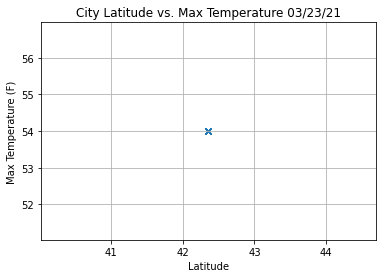

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="x",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

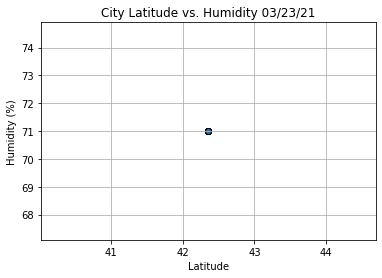

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

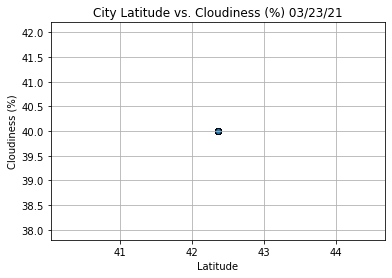

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

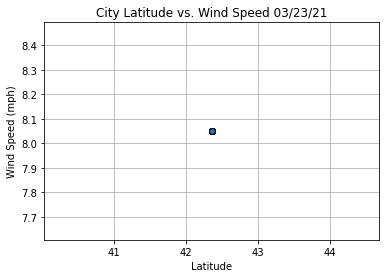

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

In [35]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [36]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [37]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

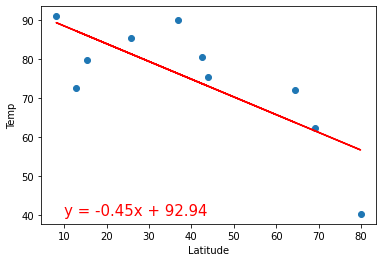

In [38]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'x_values' is not defined

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13

In [ ]:
city_data_df["Lat"] >=0

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \for % Humidity', '% Humidity',(40,10))